## PROJECT - Ontario Energy Load Forecasting 

### Data Description 
**Dataset:** Ontario hourly energy demand and pricing data from 2002 - 2023.

**Description:** The data is from a Kaggle dataset that compiled Ontatio's hourly demand and price, originally sourced from the Independent Electricity System Operator (IESO) public reports.

**Columns:** 
- `date`: calendar date (YYYY-MM-DD)
- `hour`: hour of the day (1-24)
- `hourly_demand`: total hourly Ontario energy demand in kWh
- `hourly_average_price`: average weighted hourly price in Canadian cents/kWh. 

### 1. Data Cleaning and Preprocessing

In [204]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays

In [205]:
# Loading the Kaggle dataset 
file_path = "data/ontario_electricity_demand.csv"
df_raw_data = pd.read_csv(file_path)
df_raw_data.head()

,date,hour,hourly_demand,hourly_average_price
0,2002-05-01,1,14137000,22.97
1,2002-05-01,2,13872000,23.27
2,2002-05-01,3,13820000,24.54
3,2002-05-01,4,13744000,15.17
4,2002-05-01,5,14224000,23.59


In [206]:
# Displaying information about the dataset
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183432 entries, 0 to 183431
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  183432 non-null  object 
 1   hour                  183432 non-null  int64  
 2   hourly_demand         183432 non-null  int64  
 3   hourly_average_price  183432 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.6+ MB


In [207]:
# Displaying summary statistics of the dataset
df_raw_data.describe()

,hour,hourly_demand,hourly_average_price
count,183432.000000,1.834320e+05,183432.000000
mean,12.500000,1.624913e+07,33.812201
std,6.922205,2.592200e+06,33.905004
min,1.000000,2.270000e+06,-138.790000
25%,6.750000,1.430700e+07,14.380000
50%,12.500000,1.614600e+07,29.755000
75%,18.250000,1.803900e+07,43.090000
max,24.000000,2.700500e+07,1891.140000


In [208]:
# Creating a datetime column 

# Converting hour range from 1-24 to 0-23, and add a leading 0 to single digits
df_raw_data['hour']= df_raw_data['hour'].astype(int) - 1
df_raw_data['hour']= df_raw_data['hour'].astype(str).str.zfill(2)

# Combining date and hour columns to a single timestamp 
df_raw_data['datetime'] = df_raw_data['date'] + ' ' + df_raw_data['hour'] + ':00' + ':00'

# Converting string format timestamp into Python's datetime64 format 
df_raw_data['datetime']= pd.to_datetime(df_raw_data['datetime'], format='%Y-%m-%d %H:%M:%S')

# Setting the datetime as index and sorting
df_raw_data = df_raw_data.set_index('datetime').sort_index()

# Displaying first and last few rows of data
df_raw_data

,date,hour,hourly_demand,hourly_average_price
datetime,,,,
2002-05-01 00:00:00,2002-05-01,00,14137000,22.97
2002-05-01 01:00:00,2002-05-01,01,13872000,23.27
2002-05-01 02:00:00,2002-05-01,02,13820000,24.54
2002-05-01 03:00:00,2002-05-01,03,13744000,15.17
2002-05-01 04:00:00,2002-05-01,04,14224000,23.59
...,...,...,...,...
2023-04-03 19:00:00,2023-04-03,19,16590000,27.78
2023-04-03 20:00:00,2023-04-03,20,16140000,38.68
2023-04-03 21:00:00,2023-04-03,21,15434000,82.19


In [209]:
# removing columns we don't need: date, hour & hourly_average_price
df_raw_data = df_raw_data[['hourly_demand']]

# converting hourly demand in kWh to MW and renaming hourly_demand column
df_raw_data.loc[:, 'hourly_demand'] = df_raw_data['hourly_demand'] / 1000.0
df_raw_data = df_raw_data.rename(columns = {'hourly_demand': 'demand_mw'})
df_raw_data

,demand_mw
datetime,
2002-05-01 00:00:00,14137
2002-05-01 01:00:00,13872
2002-05-01 02:00:00,13820
2002-05-01 03:00:00,13744
2002-05-01 04:00:00,14224
...,...
2023-04-03 19:00:00,16590
2023-04-03 20:00:00,16140
2023-04-03 21:00:00,15434


In [210]:
# Checking for missing hourly timestamps 

# Creating a complete hourly timeline and comparing it to datetime index 
full_range = pd.date_range(start="2002-05-01", end="2023-04-03", freq='h')
missing_hours = full_range.difference(df_raw_data.index)
print('Missing hours: ', missing_hours) 

# Checking for duplicated timestamps 
num_duplicated_dates = df_raw_data.index.duplicated().sum()
print('Number of duplicates timestamps:', num_duplicated_dates)

# Checking for missing energy demand values 
num_missing_entries = df_raw_data['demand_mw'].isna().sum()
print('Number of missing energy demand entries:', num_missing_entries )

Missing hours:  DatetimeIndex([], dtype='datetime64[ns]', freq='h')
Number of duplicates timestamps: 0
Number of missing energy demand entries: 0


#### Data Visualization

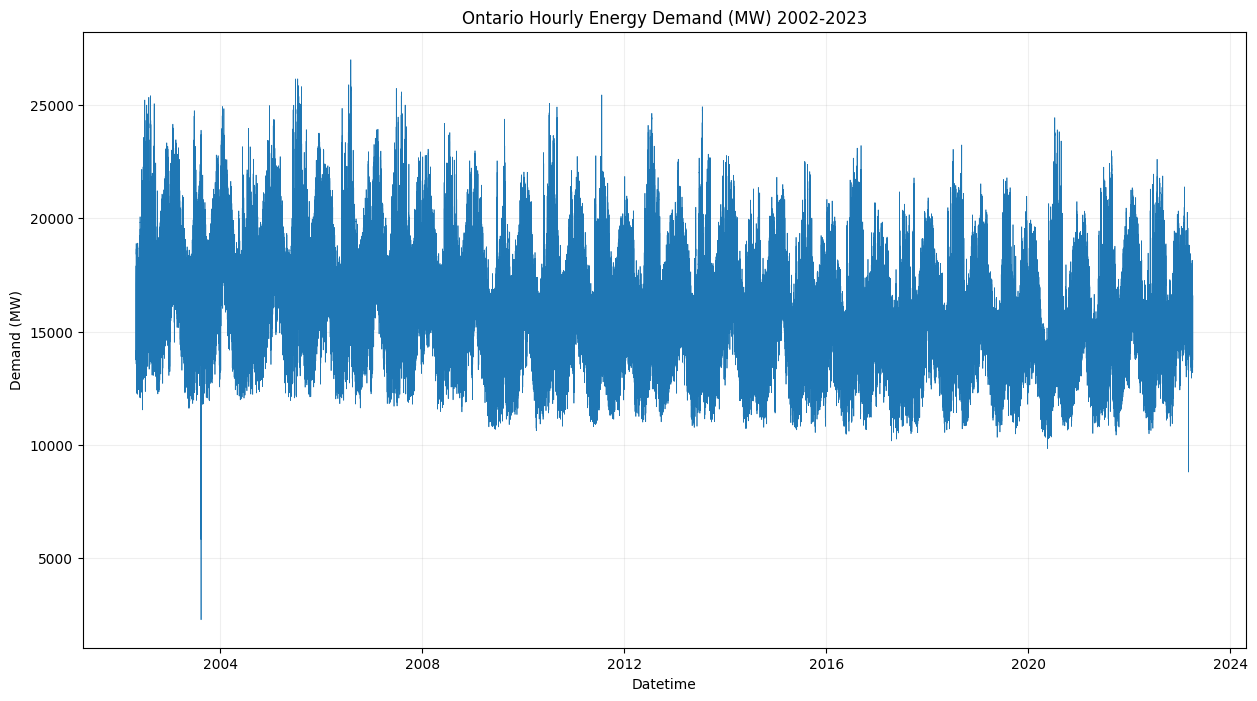

In [ ]:
# Plotting full time-series (showing ontario energy demand over the years)
plt.figure(figsize=(15,8))
plt.plot(df_raw_data['demand_mw'], linewidth =0.5)
plt.title("Ontario Hourly Energy Demand (MW) 2002-2023")
plt.xlabel("Datetime")
plt.ylabel("Demand (MW)")
plt.grid(alpha=0.2)
plt.show()

- The dataset shows consistent cyclical behaviour with short-term peaks and troughs that most likely align with winter/summer peaks and spring/fall dips. 
- The energy demand seems to appear relatively stable over the years (no dramatic growth or decline). 
- There seems to be outlier dips: sharp drop in energy demand near 2004 likely caused by corrupted data. This should be corrected prior to modeling as the outlier can bias the forecast distribution and worsen model accuracy. 
    - XGBoost, as a gradient boosting model, is sensitive to outliers since it sequentially builds trees to correct errors of previous trees, and outliers can have disproportionately large errors.
    - We want to replace these outlier values instead of removing these timestamps to keep the time series continuous.  

In [ ]:
'''
Using theshold-based detection to find outliers
The ontario minimum electricity demand seems to be around ~11 000 MW according to: https://www.ontario.ca/page/ontario-energy-snapshot
We'll define a safe threshold to prevent capturing actual possible values: 8000 MW
'''
# Identify outlier rows (rows with demand < 8000 MW)
outliers = df_raw_data[df_raw_data['demand_mw'] < 8000]
print("Outlier Rows:\n", outliers)
# Storing timestamps of outlier rows for comparison after interpolation
outlier_timestamps = outliers.index

Outlier Rows:
                      demand_mw
datetime                      
2003-08-14 15:00:00     6879.0
2003-08-14 16:00:00     2270.0
2003-08-14 17:00:00     2366.0
2003-08-14 18:00:00     2365.0
2003-08-14 19:00:00     2673.0
2003-08-14 20:00:00     3480.0
2003-08-14 21:00:00     4162.0
2003-08-14 22:00:00     4737.0
2003-08-14 23:00:00     5444.0
2003-08-15 00:00:00     5812.0
2003-08-15 01:00:00     6230.0
2003-08-15 02:00:00     6893.0
2003-08-15 03:00:00     7686.0


In [ ]:
# Replace outlier demand values with NaN
df_raw_data.loc[df_raw_data['demand_mw'] < 8000, 'demand_mw'] = np.nan
print('Number of missing values before interpolation:', df_raw_data['demand_mw'].isna().sum())

# Replacing NaN with realistic values using interpolation 
df_raw_data['demand_mw'] = df_raw_data['demand_mw'].interpolate()
# ensuring that all NaN values have been filled 
print('Number of missing values after interpolation:', df_raw_data['demand_mw'].isna().sum())

# Printing out the outlier rows with the new values from interpolation 
print(df_raw_data.loc[outlier_timestamps])

Number of missing values before interpolation: 13
Number of missing values after interpolation: 0
                        demand_mw
datetime                         
2003-08-14 15:00:00  22812.642857
2003-08-14 16:00:00  21734.285714
2003-08-14 17:00:00  20655.928571
2003-08-14 18:00:00  19577.571429
2003-08-14 19:00:00  18499.214286
2003-08-14 20:00:00  17420.857143
2003-08-14 21:00:00  16342.500000
2003-08-14 22:00:00  15264.142857
2003-08-14 23:00:00  14185.785714
2003-08-15 00:00:00  13107.428571
2003-08-15 01:00:00  12029.071429
2003-08-15 02:00:00  10950.714286
2003-08-15 03:00:00   9872.357143


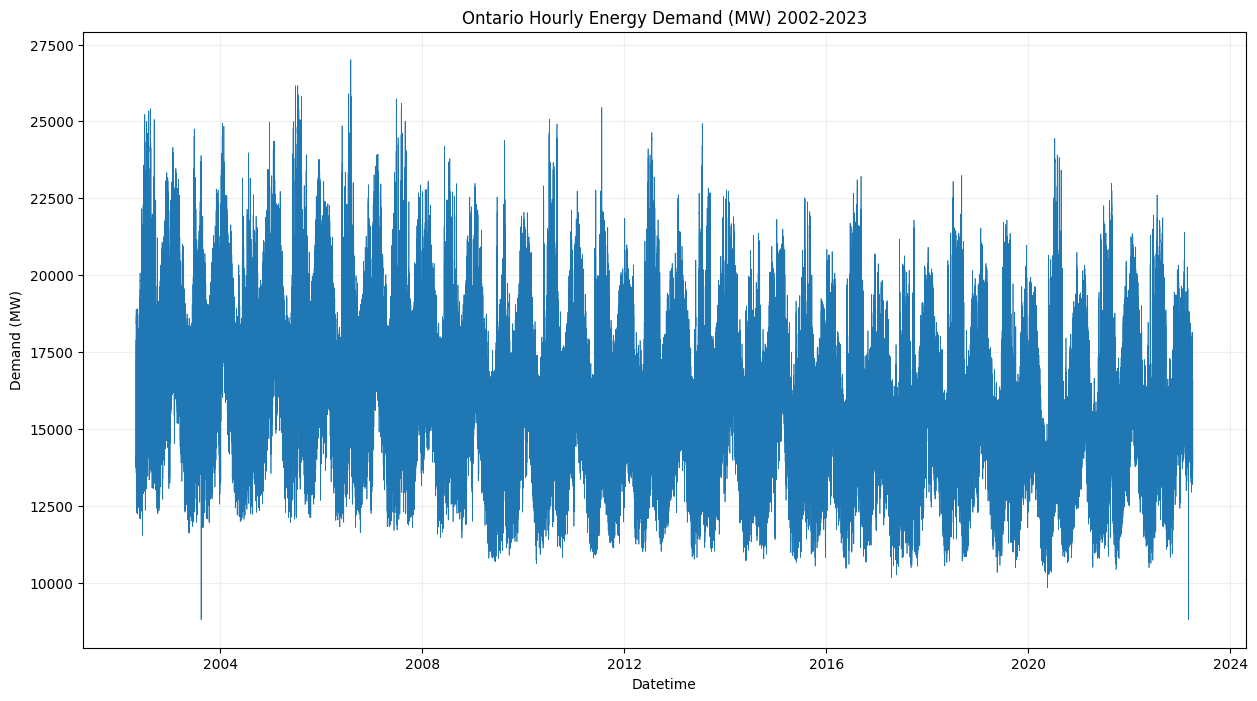

In [ ]:
# Plotting full time-series after correting outlier demand values 
plt.figure(figsize=(15,8))
plt.plot(df_raw_data['demand_mw'], linewidth =0.5)
plt.title("Ontario Hourly Energy Demand (MW) 2002-2023")
plt.xlabel("Datetime")
plt.ylabel("Demand (MW)")
plt.grid(alpha=0.2)
plt.show()


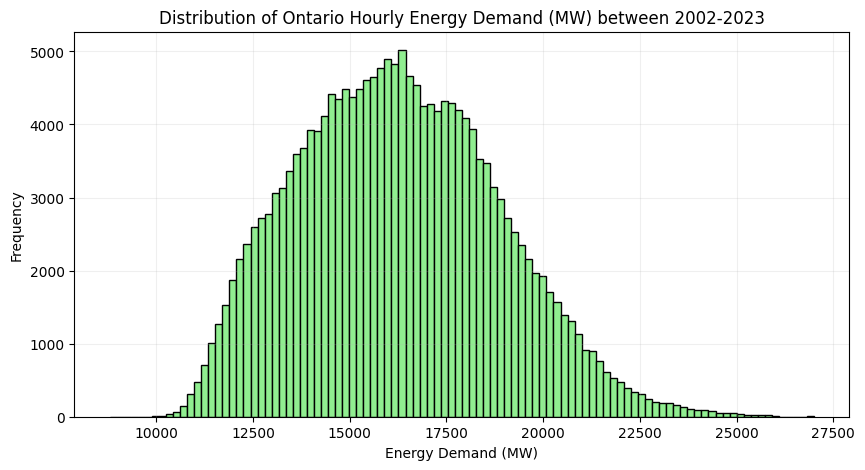

In [ ]:
# Plotting distribution of Ontario energy demand between 2002-2023
plt.figure(figsize=(10,5))
plt.hist(df_raw_data['demand_mw'], bins=100, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ontario Hourly Energy Demand (MW) between 2002-2023')
plt.xlabel('Energy Demand (MW)')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.show()

- This histogram shows that distribution of hourly demad is approximately bell-shaped and centered around 15,000 - 16,000 MW. 
- Very few observations below 10,000 MW and above 26,000 MW.

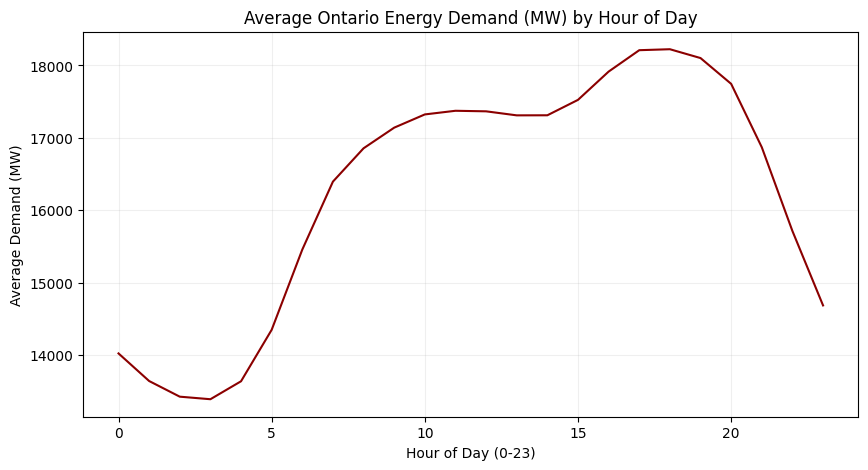

In [ ]:
# Plotting the average hourly demand to show average daily cycle 
average_by_hour = df_raw_data.groupby(df_raw_data.index.hour)['demand_mw'].mean()
plt.figure(figsize=(10,5))
plt.plot(average_by_hour, color='darkred')
plt.title('Average Ontario Energy Demand (MW) by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Demand (MW)')
plt.grid(alpha=0.2)
plt.show()

- The average hourly energy demand follows a daily cycle with the lowest demand in the early morning (around 2am) followed by a sharp increase between the hours of 4 am to 10 am, a plateu in the afternoon (around 10 am - 3 pm) before reaching peak daily demand in the evening (around 5 pm) and declining at night. 
- Based on this obersvation, hour seems to be an important feature for energy prediction.

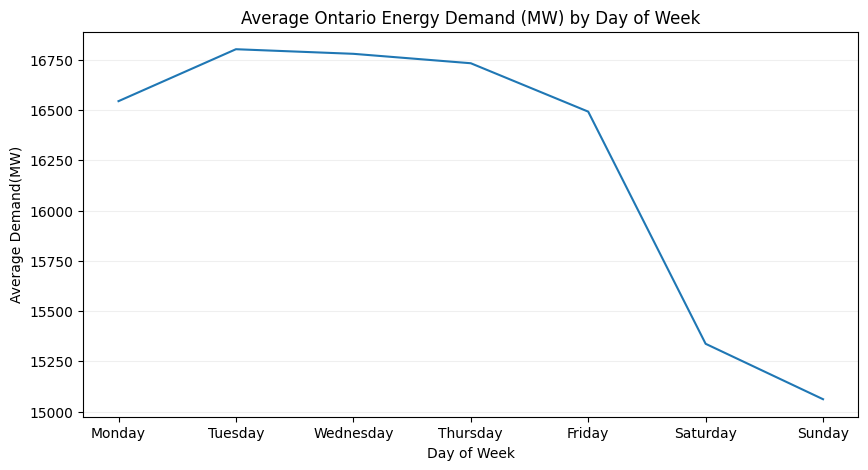

In [ ]:
# Plotting the average ontario energy demand by day of week to show average weekly cycle

# Computing demand average by day of week with Monday = 0 and Sunday = 6
average_by_dow= df_raw_data.groupby(df_raw_data.index.dayofweek)['demand_mw'].mean()

# Mapping 0-6 to monday-sunday for easier visualization and understanding 
dow_mapping_dict = {0: 'Monday', 1: 'Tuesday', 2 : 'Wednesday', 
                3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6:'Sunday'}
average_by_dow.index = average_by_dow.index.map(dow_mapping_dict)

plt.figure(figsize=(10,5))
plt.plot(average_by_dow)
plt.title('Average Ontario Energy Demand (MW) by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Demand(MW)')
plt.grid(axis = 'y', alpha=0.2)
plt.show()

- This graph shows how the average ontario energy demand fluctuates based on the day of the week. 
- Weekdays (monday-friday) have higher demand than weekends (saturday + sunday)
- Energy demand is highest on Tuesday, and slowly declines till Friday, then drops sharply on Saturday and then further on Sunday. 
- This also tells us dayofweek is an important feature. We can add a weekend indicator to increase model accuracy. 

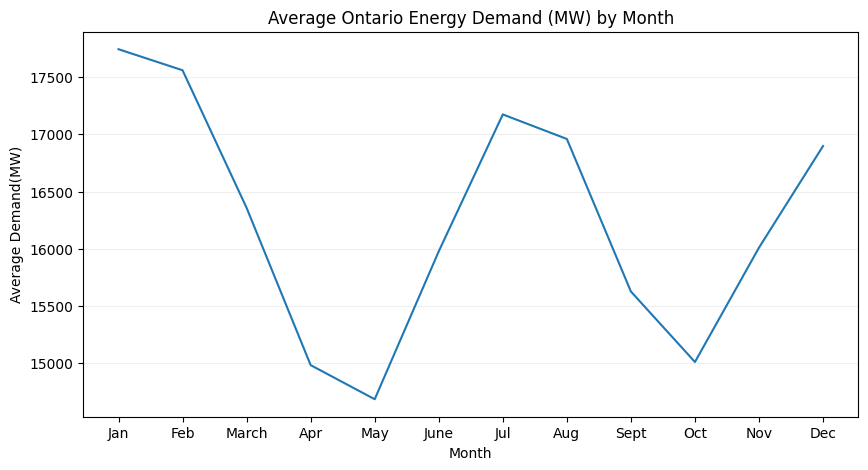

In [ ]:
# Plotting the average ontario energy demand by month to show average seasonal pattern

# Computing demand average by month with January = 1 and December = 12
average_by_month = df_raw_data.groupby(df_raw_data.index.month)['demand_mw'].mean()

# Mapping 1-12 to Jan-Dec for easier visualization 
month_mapping_dict = {1: 'Jan', 2: 'Feb', 3 : 'March', 
                        4: 'Apr', 5: 'May', 6: 'June', 
                        7:'Jul', 8:'Aug', 9:'Sept', 
                        10: 'Oct', 11: 'Nov', 12: 'Dec'}
average_by_month.index = average_by_month.index.map(month_mapping_dict)

plt.figure(figsize=(10,5))
plt.plot(average_by_month)
plt.title('Average Ontario Energy Demand (MW) by Month')
plt.xlabel('Month')
plt.ylabel('Average Demand(MW)')
plt.grid(axis = 'y', alpha=0.2)
plt.show()

- This graph shows the fluctuations in average ontario energy demand by month. 
- There are two strong season peaks: winter (January) and summer (July). 
    - Peak energy demand in winter with a smaller peak in summer. 
- There are also two strong season dips: spring (May) and fall (October). 
    - Lowest demand occurs around May, another smaller dip occurs around october. 
- Since demand varies with season, month is an essential feature for prediction.  

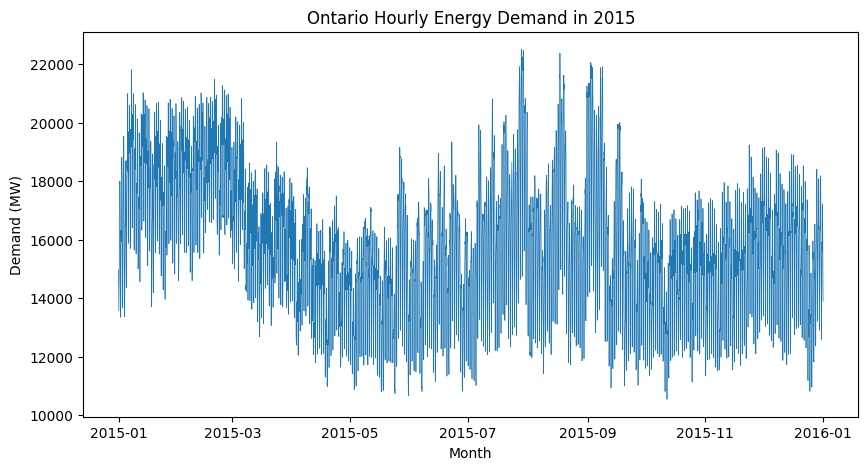

In [ ]:
# Plotting the energy demand of a single year between 2002-2023 i.e 2015

demand_2015 = df_raw_data.loc['2015']
plt.figure(figsize=(10,5))
plt.plot(demand_2015, linewidth=0.5 )
plt.title("Ontario Hourly Energy Demand in 2015")
plt.xlabel('Month')
plt.ylabel('Demand (MW)')
plt.show()

- Similar to the previous graph (showing average energy demand by month), this plot also shows strong seasonal variation in energy consumption within a single year.

### 2. Time-Series Feature Engineering


In [146]:
# Creating additional features to enhance the predictive power of our energy forecasting model

# Extracting time-related features from DateTimeIndex to capture daily, weekly and annual patterns 
df_raw_data['hour'] = df_raw_data.index.hour
df_raw_data['dayofweek'] = df_raw_data.index.dayofweek
df_raw_data['month'] = df_raw_data.index.month
df_raw_data['dayofyear'] = df_raw_data.index.dayofyear
df_raw_data['quarter'] = df_raw_data.index.quarter

# Adding a feature to indicate weekend or weekday based on dayofweek attribute (0=monday, 6=sunday)
df_raw_data['isweekend'] = (df_raw_data.index.dayofweek >= 5).astype(int) 

# Adding a feature to indicate ontario holidays using 'holidays' package (since energy demand varies on holidays vs regular days)
ontario_holidays = holidays.CA(subdiv='ON', years=range(2002,2024))
df_raw_data['isholiday'] = (df_raw_data.index.to_series().dt.date.isin(ontario_holidays).astype(int))

# Using sine-cosine encoding to properly represent cyclical time-based features: hour, day of week, month
# This helps the model understand that these features "wrap around"
df_raw_data["sin_hour"] = np.sin(2 * np.pi * df_raw_data["hour"] / 24)
df_raw_data["cos_hour"] = np.cos(2 * np.pi * df_raw_data["hour"] / 24)
df_raw_data["sin_dayofweek"] = np.sin(2 * np.pi * df_raw_data["dayofweek"] / 7)
df_raw_data["cos_dayofweek"] = np.cos(2 * np.pi * df_raw_data["dayofweek"] / 7)
df_raw_data["sin_month"] = np.sin(2 * np.pi * df_raw_data["month"] / 12)
df_raw_data["cos_month"] = np.cos(2 * np.pi * df_raw_data["month"] / 12)


In [147]:
# Using lag and rolling window features to capture temporal dependencies and recent history of demand


# Adding lag features (energy demands from previous timesteps) 
df_raw_data['lag_1h'] = df_raw_data['demand_mw'].shift(1) #demand from previous hour
df_raw_data['lag_12h'] = df_raw_data['demand_mw'].shift(12) #demand from 12 hours ago
df_raw_data['lag_24h'] = df_raw_data['demand_mw'].shift(24) #demand from 24 hours ago
df_raw_data['lag_168h'] = df_raw_data['demand_mw'].shift(168) #demand from a week ago (168 hours)

# Adding rolling window features (average demands over specified number of previous hours)
df_raw_data['rolling_6h'] = df_raw_data['demand_mw'].rolling(window=6).mean() #average over past 6 hours
df_raw_data['rolling_12h'] = df_raw_data['demand_mw'].rolling(window=12).mean() #average over past 12 hours
df_raw_data['rolling_24h'] = df_raw_data['demand_mw'].rolling(window=24).mean() #average over past 24 hours
df_raw_data['rolling_168h'] = df_raw_data['demand_mw'].rolling(window=168).mean() #average over past week (168 hours)

# The first ~168 rows will have NaNs due to lags/rolling windows.
# Droping rows with any NaNs 
df_data = df_raw_data.dropna().copy()

# Displaying df with new features 
df_data

,demand_mw,hour,dayofweek,month,dayofyear,quarter,isweekend,isholiday,sin_hour,cos_hour,...,sin_month,cos_month,lag_1h,lag_12h,lag_24h,lag_168h,rolling_6h,rolling_12h,rolling_24h,rolling_168h
datetime,,,,,,,,,,,,,,,,,,,,,
2002-05-08 00:00:00,13434.0,0,2,5,128,2,0,0,0.000000,1.000000,...,0.500000,-0.866025,13950.0,18131.0,13619.0,14137.0,15584.166667,16600.750000,16298.708333,15931.101190
2002-05-08 01:00:00,13127.0,1,2,5,128,2,0,0,0.258819,0.965926,...,0.500000,-0.866025,13434.0,17913.0,13184.0,13872.0,14895.833333,16201.916667,16296.333333,15926.666667
2002-05-08 02:00:00,12968.0,2,2,5,128,2,0,0,0.500000,0.866025,...,0.500000,-0.866025,13127.0,17762.0,13086.0,13820.0,14126.500000,15802.416667,16291.416667,15921.595238
2002-05-08 03:00:00,13112.0,3,2,5,128,2,0,0,0.707107,0.707107,...,0.500000,-0.866025,12968.0,17935.0,13092.0,13744.0,13595.333333,15400.500000,16292.250000,15917.833333
2002-05-08 04:00:00,13646.0,4,2,5,128,2,0,0,0.866025,0.500000,...,0.500000,-0.866025,13112.0,17819.0,13484.0,14224.0,13372.833333,15052.750000,16299.000000,15914.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-03 19:00:00,16590.0,19,0,4,93,2,0,0,-0.965926,0.258819,...,0.866025,-0.500000,16452.0,16437.0,16440.0,17613.0,16409.000000,16115.916667,15336.500000,15433.678571
2023-04-03 20:00:00,16140.0,20,0,4,93,2,0,0,-0.866025,0.500000,...,0.866025,-0.500000,16590.0,16187.0,15864.0,16990.0,16419.166667,16112.000000,15348.000000,15428.619048
2023-04-03 21:00:00,15434.0,21,0,4,93,2,0,0,-0.707107,0.707107,...,0.866025,-0.500000,16140.0,16111.0,15187.0,15937.0,16252.500000,16055.583333,15358.291667,15425.625000


In [148]:
'''
- Energy load correlates strongly with weather/temperature, so adding a 'temperature' feature can improve model predictions 
- We use Toronto weather data since it is the most population-dense region in Ontario and strongly influences provincial demand
- Hourly weather data between 2002-2023 was downloaded using Open-Mateo API in 'download_weather_data.ipynb' and saved as a CSV file.
'''

# Importing hourly temperature data
temperature_df = pd.read_csv('data/toronto_hourly_temp_2002_2023.csv')
temperature_df['datetime'] = pd.to_datetime(temperature_df['datetime'])
temperature_df = temperature_df.set_index('datetime')

# Displaying temperature data
temperature_df

,temperature_C
datetime,
2002-05-08 00:00:00,7.7
2002-05-08 01:00:00,7.2
2002-05-08 02:00:00,6.3
2002-05-08 03:00:00,5.7
2002-05-08 04:00:00,5.3
...,...
2023-04-03 19:00:00,10.0
2023-04-03 20:00:00,9.6
2023-04-03 21:00:00,9.0


In [149]:
# Merging temperature into the main dataset on datetime index

df_data = df_data.join(temperature_df)
df_data.head()

,demand_mw,hour,dayofweek,month,dayofyear,quarter,isweekend,isholiday,sin_hour,cos_hour,...,cos_month,lag_1h,lag_12h,lag_24h,lag_168h,rolling_6h,rolling_12h,rolling_24h,rolling_168h,temperature_C
datetime,,,,,,,,,,,,,,,,,,,,,
2002-05-08 00:00:00,13434.0,0,2,5,128,2,0,0,0.000000,1.000000,...,-0.866025,13950.0,18131.0,13619.0,14137.0,15584.166667,16600.750000,16298.708333,15931.101190,7.7
2002-05-08 01:00:00,13127.0,1,2,5,128,2,0,0,0.258819,0.965926,...,-0.866025,13434.0,17913.0,13184.0,13872.0,14895.833333,16201.916667,16296.333333,15926.666667,7.2
2002-05-08 02:00:00,12968.0,2,2,5,128,2,0,0,0.500000,0.866025,...,-0.866025,13127.0,17762.0,13086.0,13820.0,14126.500000,15802.416667,16291.416667,15921.595238,6.3
2002-05-08 03:00:00,13112.0,3,2,5,128,2,0,0,0.707107,0.707107,...,-0.866025,12968.0,17935.0,13092.0,13744.0,13595.333333,15400.500000,16292.250000,15917.833333,5.7
2002-05-08 04:00:00,13646.0,4,2,5,128,2,0,0,0.866025,0.500000,...,-0.866025,13112.0,17819.0,13484.0,14224.0,13372.833333,15052.750000,16299.000000,15914.392857,5.3


### 3. Time-Based Train / Test Split

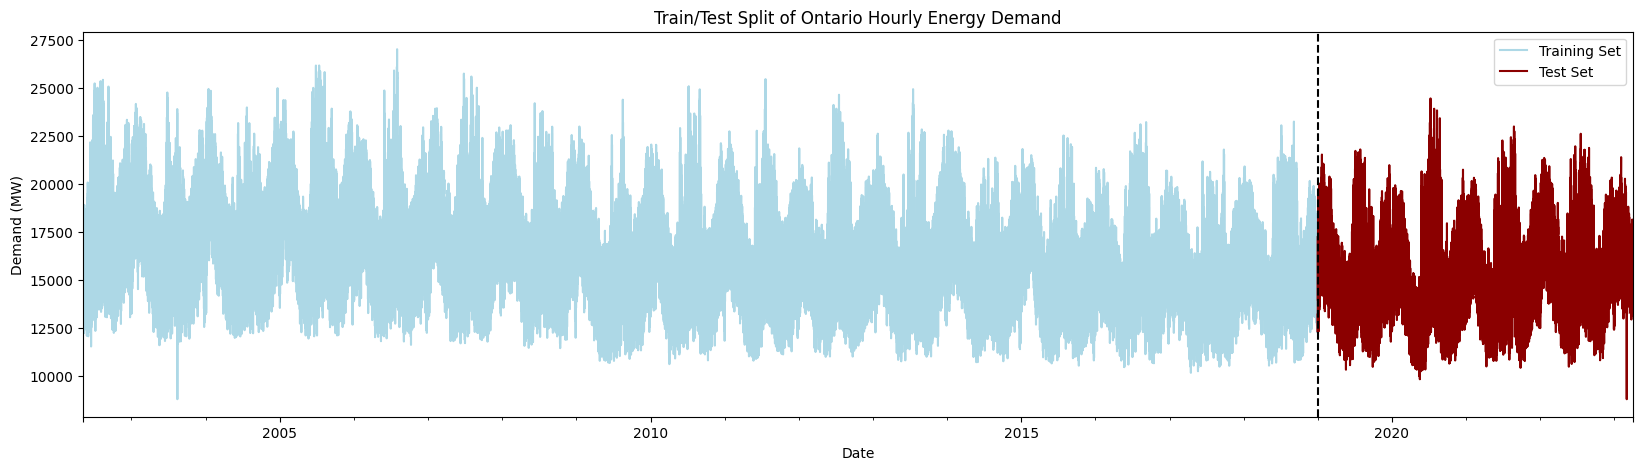

In [150]:
# Using data from before 2019 as training dataset, and after 2019 as test dataset
split_date = '2019-01-01'
train_set = df_data.loc[df_data.index < split_date].copy()
test_set = df_data.loc[df_data.index >= split_date].copy()

# Plotting the hourly energy demands in the training vs test set
fig, ax = plt.subplots(figsize=(20, 5))
train_set['demand_mw'].plot(ax=ax, label='Training Set', color='lightblue') # training set in blue
test_set['demand_mw'].plot(ax=ax, label='Test Set', color='darkred') # test set in red
ax.axvline(pd.to_datetime('2019-01-01'), color='black', ls='--') #adding a vertical split line
ax.set_title('Train/Test Split of Ontario Hourly Energy Demand')
ax.set_xlabel('Date')
ax.set_ylabel('Demand (MW)')
ax.legend()
plt.show()

### 5. Training & Evaluating ML Models: 
#### Random Forest Regression (Baseline Model) and XGboost

In [151]:
# Importing required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor

In [152]:
# Preparing training and test sets 

# Selecting target variable 
target = 'demand_mw'

# Selecting feature columns
feature_cols =[]
for col in df_data.columns:
    if col != target:
        feature_cols.append(col)

# Separating target column and features columns
x_train, y_train = train_set[feature_cols], train_set[target]
x_test, y_test = test_set[feature_cols], test_set[target]

In [153]:
# Defining model evaluator function (returns MSE, RMSE, MAE and MAPE)

def evaluate_model(y_predicted, y_actual, model):
    mse = mean_squared_error(y_actual, y_predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_actual, y_predicted)
    mape = mean_absolute_percentage_error(y_actual, y_predicted) * 100


    scores_dict = {'model': model,
                    'mse': mse, 
                    'rmse': rmse,
                    'mae': mae,
                    'mape (%)': mape}

    return scores_dict


##### Random Forest Regression (Baseline Model):

In [154]:
# Creating a TimeSeriesSplit object for time series cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits = n_splits) # initializing TimeSeriesSplit with 5 folds

# Using Scikit-Learn's GridSearchCV method for hyperparameter tuning 

# Defining a grid of hyperparameter ranges 
rf_parameter_grid = {
    'n_estimators': [100, 200, 300], # number of decision trees 
    'max_depth': [3, 5, 7],  # maximum depth of each tree 
    'min_samples_leaf': [1, 2, 5], # minumum samples a leaf must have
    'min_samples_split': [2, 5, 10], # minimum number of samples needed to split a node
    'max_features': ['sqrt', 0.5 , None]  # number of features considered by each tree when splitting a node
}

# Creating the random forest base model to tune 
rf = RandomForestRegressor(random_state=42)

# Performing grid search  
rf_grid_search = GridSearchCV(estimator= rf,   
                           param_grid=rf_parameter_grid, 
                           cv= tscv,   # using TimeSeriesSplit as cross-validation splitter
                           scoring = "neg_root_mean_squared_error", # using negative RMSE because sklearn maximizes scoring metric
                           n_jobs = -1,  
                           verbose=1,   
                           refit = True # refit best model on full training set
                           )

# Fitting the grid search object on the training set
rf_grid_search.fit(x_train, y_train)

# Printing best hyperparameters and the associated training score RMSE 
print(f"Best params for random forest : {rf_grid_search.best_params_}")
best_RF_score = -rf_grid_search.best_score_
print(f"Best training RMSE: {best_RF_score}")

# Retrieving the best model 
best_RF_model = rf_grid_search.best_estimator_

# Predicting target variable using test set
y_pred_rf = best_RF_model.predict(x_test)

# Evaluating model's performance on test set 
rf_test_scores = evaluate_model(y_pred_rf, y_test, 'Random Forest Model')
print(f"Random Forest Test MSE:  {rf_test_scores['mse']:.2f}")
print(f"Random Forest Test RMSE: {rf_test_scores['rmse']:.2f}")
print(f"Random Forest Test MAE:  {rf_test_scores['mae']:.2f}")
print(f"Random Forest Test MAPE: {rf_test_scores['mape (%)']:.2f}%")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params for random forest : {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best training RMSE: 342.14652364284893
Random Forest Test MSE:  123181.35
Random Forest Test RMSE: 350.97
Random Forest Test MAE:  271.08
Random Forest Test MAPE: 1.75%


##### XGBoost Model

In [ ]:
# Using Scikit-Learn's GridSearchCV method for hyperparameter tuning 
n_splits = 5
tscv = TimeSeriesSplit(n_splits = n_splits) # initializing TimeSeriesSplit with 5 folds

# Defining a grid of hyperparameter ranges 
xgb_parameter_grid = {
    'n_estimators': [250, 500, 1000], # number of decision trees
    'max_depth': [3, 5, 7],  # maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1], 
    'gamma': [0, 1],  # minimum loss reduction required to make a further split 
    'subsample': [0.7, 1], # fraction of samples used for each tree
    'colsample_bytree': [0.7, 1] # fraction of columns (features) to be sampled for each tree
}

# Defining the XGBoost model to tune 
xgb_model = XGBRegressor(random_state=42)

# Performing grid search  
xgb_grid_search =  GridSearchCV(estimator= xgb_model,   
                           param_grid=xgb_parameter_grid, 
                           cv= tscv,   # using TimeSeriesSplit as cross-validation splitter
                           scoring = "neg_root_mean_squared_error", # using negative RMSE because sklearn maximizes scoring metric
                           n_jobs = -1,    
                           verbose=1,
                           refit = True # refit best model on full training set
                           )

# Fitting the grid search object on the training set
xgb_grid_search.fit(x_train, y_train)

# Printing best hyperparameters and the associated training score RMSE 
print(f"Best params for XGBoost :", xgb_grid_search.best_params_)
best_xgb_score = -xgb_grid_search.best_score_
print(f"Best training RMSE: {best_xgb_score}")

# Retrieving the best model 
best_xgb_model = xgb_grid_search.best_estimator_

# Predicting target variable using test set
y_pred_xgb = best_xgb_model.predict(x_test)

# Evaluating model's performance on test set 
xgb_test_scores = evaluate_model(y_pred_xgb, y_test, 'XGBoost')
print(f"XGBoost Test MSE:  {xgb_test_scores['mse']:.2f}")
print(f"XGBoost Test RMSE: {xgb_test_scores['rmse']:.2f}")
print(f"XGBoost Test MAE:  {xgb_test_scores['mae']:.2f}")
print(f"XGBoost Test MAPE: {xgb_test_scores['mape (%)']:.2f}%")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Best params for XGBoost : {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.7}
Best training RMSE: 193.0021435972208
XGBoost Test MSE:  46527.49
XGBoost Test RMSE: 215.70
XGBoost Test MAE:  157.21
XGBoost Test MAPE: 1.02%


In [156]:
# Comparing performance of random forest model vs XGBoost model 

# Converting evaluation score dictionaries into a DataFrame for better visualization
model_performance = pd.DataFrame([rf_test_scores, xgb_test_scores])
print('Comparing Performance of Random Forest Model and XGboost Model On Test Set:')
model_performance


Comparing Performance of Random Forest Model and XGboost Model On Test Set:


,model,mse,rmse,mae,mape (%)
0,Random Forest Model,123181.352454,350.972011,271.075545,1.751674
1,XGBoost,46527.487240,215.702312,157.212968,1.019844


In this part of the project, we built two machine learning models for hourly Ontario energy demand forecasting: 
- **Baseline Random Forest Regressor**
- **XGBoost Regressor**

Both were trained using the same feature set, time-series cross validation, and GridSearchCV to find optimized hyperparameters. Once the optimal hyperparameters were found, the models were trained using the training set and their performance was evaluated on the test set. 

Based on the results of the evaluation metrics, we can see that the XGBoost model significantly outperformed the Random Forest model. In particular, we can see a nearly 40% reduction in the RMSE when using XGBoost compared to Random Forest, indicating stronger predictive accuracy. Moreover, the XGBoost model had a MAPE of 1.02% (compared to 1.75% with Random Forest), meaning that the model's predictions are, on average, within ~1% error of the actual hourly demand. 

##### Plotting Model Predictions On Test Set vs. Actual Values

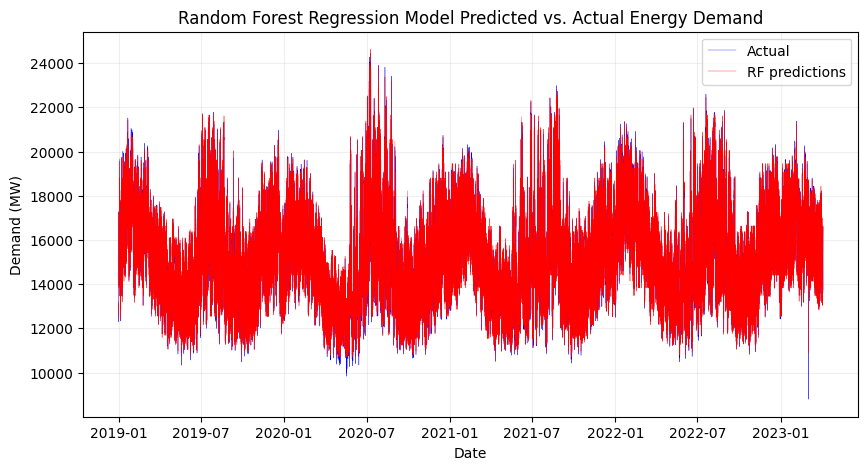

In [157]:
# Plotting the random forest model predicted energy demand values vs actual values
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=0.25) # plotting actual values in blue 
plt.plot(y_test.index, y_pred_rf, label='RF predictions', color='red', linewidth=0.25) # plotting random forest predicted values in red
plt.title('Random Forest Regression Model Predicted vs. Actual Energy Demand')
plt.ylabel('Demand (MW)')
plt.xlabel('Date')
plt.legend() 
plt.grid(alpha=0.2)
plt.show()

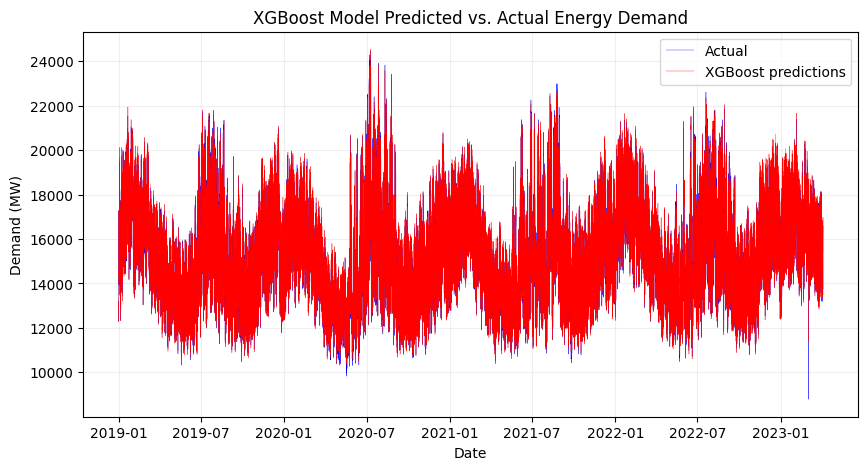

In [158]:
# Plotting the XGBoost model predicted energy demand values vs actual values
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=0.25) # plotting actual values in blue 
plt.plot(y_test.index, y_pred_xgb, label='XGBoost predictions', color='red', linewidth=0.25) # plotting XGBoost predicted values in red
plt.title('XGBoost Model Predicted vs. Actual Energy Demand')
plt.ylabel('Demand (MW)')
plt.xlabel('Date')
plt.legend() 
plt.grid(alpha=0.2)
plt.show()

From the actual vs. predicted plots, we can see both models are able to follow the general seasonal and daily patterns of electricity demand. However, XGBoost tracks the actual values more precisely, especially during extreme peaks and dips.

##### Plotting Residuals (errors)

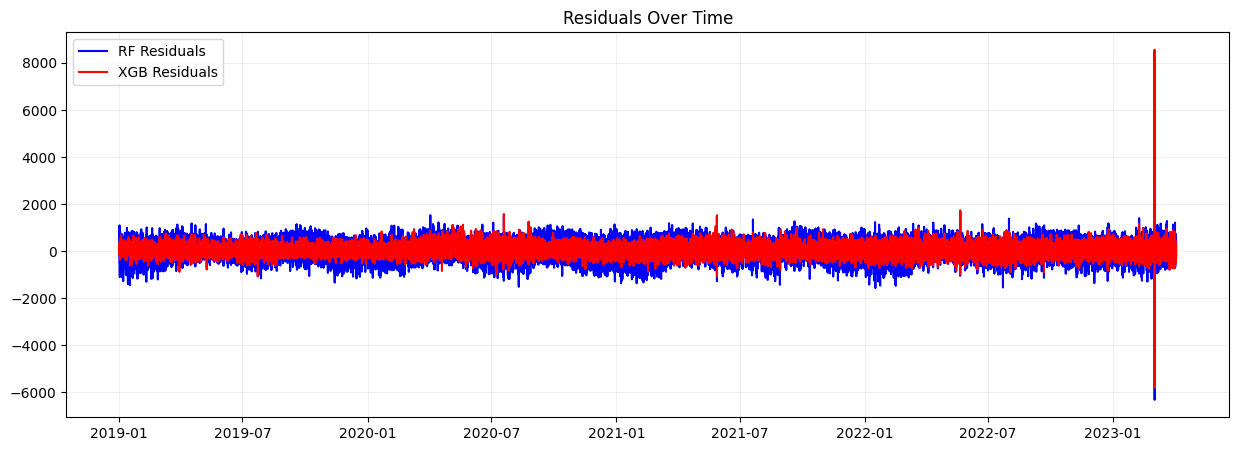

In [251]:
rf_residuals = y_pred_rf - y_test.values # calculating difference between RF predicted values and actual values  
xgb_residuals = y_pred_xgb - y_test.values  # calculating difference between XGBoost predicted values and actual values  

plt.figure(figsize=(15,5))
plt.plot(y_test.index, rf_residuals, label="RF Residuals", color='blue')
plt.plot(y_test.index, xgb_residuals, label="XGB Residuals", color = 'red')
plt.title("Residuals Over Time")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()


Comparing the residual plots of the two models, we can see that the Random Forest exhibits larger and more variable errors, while XGBoost residuals are more consistent and tightly clustered around zero, indicating a more stable and unbiased fit. This tighter residual distribution suggests better XGBoost generalizes better.



##### Feature Importance

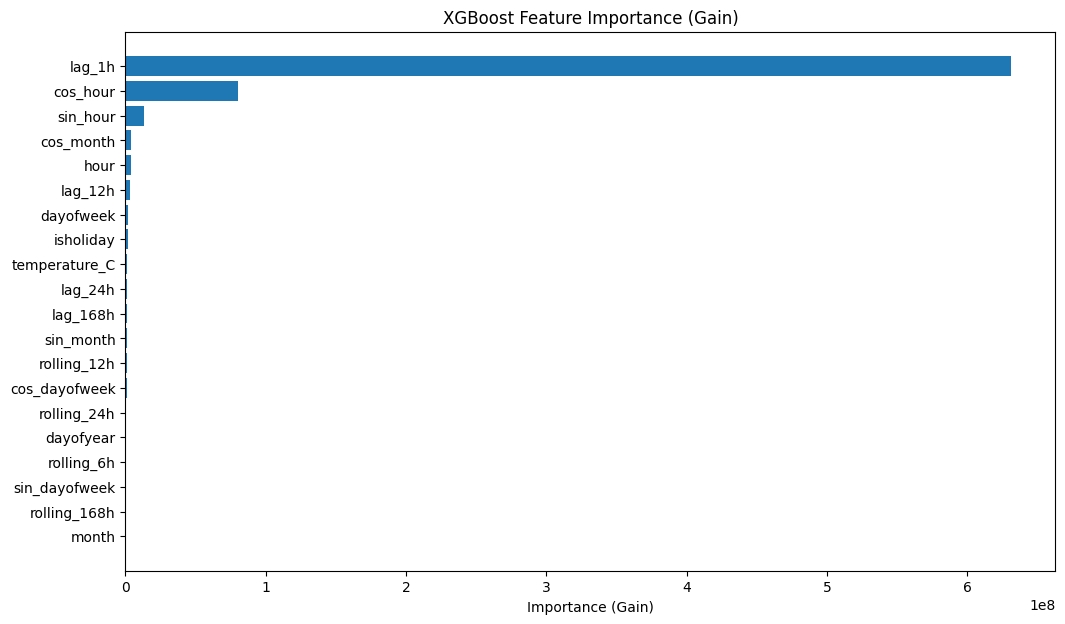

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.barh(importance_df['feature'], importance_df['importance_gain'])
plt.gca().invert_yaxis()
plt.xlabel("Importance (Gain)")
plt.title("XGBoost Feature Importance (Gain)")
plt.show()
